In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the Excel file
df = pd.read_excel(r"C:\Users\Padma\OneDrive\Desktop\Cement\Combined_P&L_With_Average_Median_Yearwise.xlsx")

### Task 1:

In [3]:
df.columns = df.columns.map(lambda x: str(x).strip())
metric_col = 'Financial_Metric' if 'Financial_Metric' in df.columns else 'Metric'

In [4]:
# Define year columns (strings)
year_cols = ['2013', '2014', '2015', '2016', '2017',
             '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025']

 #Filter out Average and Median
companies_df = df[~df['Company'].isin(['Average', 'Median'])]
companies_df.columns = companies_df.columns.map(lambda x: str(x).strip())
year_cols = [col for col in companies_df.columns if col.isdigit() and 2010 <= int(col) <= 2030]

# Ensure numeric
for col in year_cols:
    companies_df[col] = pd.to_numeric(companies_df[col], errors='coerce')

C:\Users\Padma\AppData\Local\Temp\ipykernel_20464\4026866012.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  companies_df[col] = pd.to_numeric(companies_df[col], errors='coerce')


In [5]:
print("All columns:", companies_df.columns.tolist())

All columns: ['Financial_Metric', 'Company', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025']


In [6]:
# Extract function
def extract_metric(metric):
    return companies_df[companies_df[metric_col] == metric].set_index('Company')[year_cols]

# Extract key metrics
sales_df = extract_metric('Sales')
op_df = extract_metric('Operating Profit')
pat_df = extract_metric('Net Profit')

In [7]:
def interpolate_polynomial_axis1(df, order=2):
    df_temp = df.copy()
    df_temp.columns = df_temp.columns.astype(int)
    df_interp = df_temp.interpolate(method='polynomial', order=order, axis=1, limit_direction='both')
    df_interp.columns = df_interp.columns.astype(str)
    return df_interp

sales_df = interpolate_polynomial_axis1(sales_df)
op_df = interpolate_polynomial_axis1(op_df)
pat_df = interpolate_polynomial_axis1(pat_df)

In [8]:
sales_df.head()

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
Company,,,,,,,,,,,,,
ACC,11062.0,11646.0,11706.0,10990.0,13285.0,14802.0,15658.0,13786.0,16152.0,20285.770733,22210.0,19959.0,21762.0
AMBUJACEM,9161.0,9955.0,9437.0,20094.0,23609.0,26041.0,27104.0,24516.0,28965.0,36276.020897,38937.0,33160.0,35045.0
DALBHARAT,NaN,NaN,NaN,NaN,7444.0,8579.0,9484.0,9674.0,10110.0,11286.000000,13552.0,14691.0,13980.0
SHREECEM,5418.0,5715.0,6259.0,5514.0,8594.0,9833.0,12555.0,12868.0,13560.0,15010.000000,17852.0,20521.0,NaN
ULTRACEMCO,NaN,20730.0,23306.0,25153.0,25375.0,30979.0,41462.0,42430.0,44726.0,52599.000000,63240.0,70908.0,75955.0


In [9]:
op_df.head

<bound method NDFrame.head of               2013    2014    2015    2016    2017    2018    2019    2020  \
Company                                                                      
ACC         1646.0  1529.0  1583.0  1458.0  1915.0  2048.0  2413.0  2355.0   
AMBUJACEM   1669.0  1934.0  1542.0  3181.0  3858.0  4011.0  4597.0  5006.0   
DALBHARAT      NaN     NaN     NaN     NaN  1894.0  2036.0  1942.0  2083.0   
SHREECEM    1561.0  1390.0  1344.0  1407.0  2513.0  2473.0  2797.0  3771.0   
ULTRACEMCO     NaN  4035.0  4425.0  4901.0  5212.0  6145.0  7347.0  9246.0   

               2021          2022     2023     2024     2025  
Company                                                       
ACC          2998.0   2366.377763   1925.0   3062.0   3061.0  
AMBUJACEM    6210.0   5635.473151   5122.0   6400.0   5971.0  
DALBHARAT    2770.0   2426.000000   2328.0   2639.0   2407.0  
SHREECEM     4091.0   3710.000000   2960.0   4518.0      NaN  
ULTRACEMCO  11568.0  11514.000000  10620.0  1

In [10]:
pat_df.head

<bound method NDFrame.head of               2013    2014    2015    2016    2017    2018    2019    2020  \
Company                                                                      
ACC         1095.0  1162.0   587.0   658.0   925.0  1521.0  1378.0  1430.0   
AMBUJACEM   1278.0  1487.0   808.0  1434.0  1945.0  2973.0  2783.0  3107.0   
DALBHARAT      NaN     NaN     NaN     NaN    44.0   291.0   349.0   238.0   
SHREECEM    1004.0   787.0   426.0  1143.0  1339.0  1384.0  1015.0  1544.0   
ULTRACEMCO     NaN  2213.0  2102.0  2480.0  2714.0  2224.0  2400.0  5751.0   

              2021         2022    2023    2024    2025  
Company                                                  
ACC         1863.0  1160.957979   885.0  2337.0  2402.0  
AMBUJACEM   3711.0  3134.745058  3024.0  4738.0  5158.0  
DALBHARAT   1183.0   845.000000  1079.0   853.0   699.0  
SHREECEM    2290.0  2337.000000  1269.0  2396.0     NaN  
ULTRACEMCO  5462.0  7334.000000  5073.0  7004.0  6040.0  >

In [11]:
# Year-on-year growth
def yoy_growth(df): return df.pct_change(axis=1) * 100

sales_yoy = yoy_growth(sales_df)
op_yoy = yoy_growth(op_df)
pat_yoy = yoy_growth(pat_df)


C:\Users\Padma\AppData\Local\Temp\ipykernel_20464\2323482744.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  def yoy_growth(df): return df.pct_change(axis=1) * 100
C:\Users\Padma\AppData\Local\Temp\ipykernel_20464\2323482744.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  def yoy_growth(df): return df.pct_change(axis=1) * 100
C:\Users\Padma\AppData\Local\Temp\ipykernel_20464\2323482744.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change 

In [12]:
# CAGR calculation
def calculate_cagr(df):
    start, end = year_cols[0], year_cols[-1]
    n = int(end) - int(start)
    cagr = ((df[end] / df[start]) ** (1/n) - 1) * 100
    return cagr.round(2)

In [13]:
sales_cagr = calculate_cagr(sales_df)
op_cagr = calculate_cagr(op_df)
pat_cagr = calculate_cagr(pat_df)

# Final CAGR Table
cagr_table = pd.DataFrame({
    'Revenue (Sales) CAGR (%)': calculate_cagr(sales_df),
    'EBITDA CAGR (%)': calculate_cagr(op_df),
    'PAT CAGR (%)': calculate_cagr(pat_df)
}).round(2)

In [14]:
# Display with better formatting
from IPython.display import display

# Sort (optional) by Revenue CAGR
cagr_table_sorted = cagr_table.sort_values(by='Revenue (Sales) CAGR (%)', ascending=False)

# Display the sorted table
display(cagr_table_sorted.style
        .background_gradient(cmap='YlGn')
        .format("{:.2f}")
        .set_caption("📈 CAGR Summary Table (%): Revenue, EBITDA, PAT"))


,Revenue (Sales) CAGR (%),EBITDA CAGR (%),PAT CAGR (%)
Company,,,
AMBUJACEM,11.83,11.21,12.33
ACC,5.80,5.31,6.77
DALBHARAT,nan,nan,nan
SHREECEM,nan,nan,nan
ULTRACEMCO,nan,nan,nan


In [15]:
missing_report = {
    "Sales": sales_df.isna().sum().sum(),
    "Operating Profit": op_df.isna().sum().sum(),
    "Net Profit": pat_df.isna().sum().sum(),
    "YoY Sales": sales_yoy.isna().sum().sum(),
    "YoY EBITDA": op_yoy.isna().sum().sum(),
    "YoY PAT": pat_yoy.isna().sum().sum(),
}

cagr_table_sorted = cagr_table.sort_values(by='Revenue (Sales) CAGR (%)', ascending=False)

# Output the sorted CAGR table and missing report
cagr_table_sorted, missing_report

(            Revenue (Sales) CAGR (%)  EBITDA CAGR (%)  PAT CAGR (%)
 Company                                                            
 AMBUJACEM                      11.83            11.21         12.33
 ACC                             5.80             5.31          6.77
 DALBHARAT                        NaN              NaN           NaN
 SHREECEM                         NaN              NaN           NaN
 ULTRACEMCO                       NaN              NaN           NaN,
 {'Sales': np.int64(6),
  'Operating Profit': np.int64(6),
  'Net Profit': np.int64(6),
  'YoY Sales': np.int64(10),
  'YoY EBITDA': np.int64(10),
  'YoY PAT': np.int64(10)})

In [16]:
# Final CAGR summary table (already calculated and cleaned)
cagr_table = pd.DataFrame({
    'Revenue (Sales) CAGR (%)': sales_cagr,
    'EBITDA CAGR (%)': op_cagr,
    'PAT CAGR (%)': pat_cagr
}).round(2)

# Save to Excel with all YoY sheets + CAGR Summary
output_path = r"C:\Users\Padma\OneDrive\Desktop\Cement\PnL_CAGR_YoY_Export.xlsx"

with pd.ExcelWriter(output_path) as writer:
    sales_yoy.to_excel(writer, sheet_name="YoY_Sales")
    op_yoy.to_excel(writer, sheet_name="YoY_EBITDA")
    pat_yoy.to_excel(writer, sheet_name="YoY_PAT")
    cagr_table.to_excel(writer, sheet_name="CAGR Summary")

print(f"✅ Saved full Excel file to: {output_path}")


✅ Saved full Excel file to: C:\Users\Padma\OneDrive\Desktop\Cement\PnL_CAGR_YoY_Export.xlsx


In [17]:
def report_missing_values(df, name):
    missing = df.isna().sum()
    total_missing = missing.sum()
    print(f"🔍 Missing values in {name}: {total_missing}")
    if total_missing > 0:
        print(missing[missing > 0])
    else:
        print("✅ No missing values.\n")

# Check in metric-level data
report_missing_values(sales_df, "Sales")
report_missing_values(op_df, "Operating Profit")
report_missing_values(pat_df, "Net Profit")

# Check in YoY growth
report_missing_values(sales_yoy, "YoY Sales")
report_missing_values(op_yoy, "YoY EBITDA")
report_missing_values(pat_yoy, "YoY PAT")


🔍 Missing values in Sales: 6
2013    2
2014    1
2015    1
2016    1
2025    1
dtype: int64
🔍 Missing values in Operating Profit: 6
2013    2
2014    1
2015    1
2016    1
2025    1
dtype: int64
🔍 Missing values in Net Profit: 6
2013    2
2014    1
2015    1
2016    1
2025    1
dtype: int64
🔍 Missing values in YoY Sales: 10
2013    5
2014    2
2015    1
2016    1
2017    1
dtype: int64
🔍 Missing values in YoY EBITDA: 10
2013    5
2014    2
2015    1
2016    1
2017    1
dtype: int64
🔍 Missing values in YoY PAT: 10
2013    5
2014    2
2015    1
2016    1
2017    1
dtype: int64


In [18]:
def interpolate_polynomial_axis1(df, order=2):
    df_temp = df.copy()
    df_temp.columns = df_temp.columns.astype(int)  # Ensure numeric for interpolation
    df_interp = df_temp.interpolate(method='polynomial', order=order, axis=1, limit_direction='both')
    df_interp.columns = df_interp.columns.astype(str)  # Restore original string year columns
    return df_interp


In [19]:
# Interpolate missing values in the base metric dataframes
sales_df = interpolate_polynomial_axis1(sales_df)
op_df = interpolate_polynomial_axis1(op_df)
pat_df = interpolate_polynomial_axis1(pat_df)

In [20]:
def yoy_growth(df): return df.pct_change(axis=1) * 100

sales_yoy = yoy_growth(sales_df)
op_yoy = yoy_growth(op_df)
pat_yoy = yoy_growth(pat_df)


C:\Users\Padma\AppData\Local\Temp\ipykernel_20464\3365401252.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  def yoy_growth(df): return df.pct_change(axis=1) * 100
C:\Users\Padma\AppData\Local\Temp\ipykernel_20464\3365401252.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  def yoy_growth(df): return df.pct_change(axis=1) * 100
C:\Users\Padma\AppData\Local\Temp\ipykernel_20464\3365401252.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change 

In [21]:
def calculate_cagr(df):
    start, end = year_cols[0], year_cols[-1]
    n = int(end) - int(start)
    cagr = ((df[end] / df[start]) ** (1/n) - 1) * 100
    return cagr.round(2)

sales_cagr = calculate_cagr(sales_df)
op_cagr = calculate_cagr(op_df)
pat_cagr = calculate_cagr(pat_df)

cagr_table = pd.DataFrame({
    'Revenue (Sales) CAGR (%)': sales_cagr,
    'EBITDA CAGR (%)': op_cagr,
    'PAT CAGR (%)': pat_cagr
}).round(2)


In [22]:
with pd.ExcelWriter(r"C:\Users\Padma\OneDrive\Desktop\Cement\PnL_Analysis_After_Interpolation.xlsx") as writer:
    sales_yoy.to_excel(writer, sheet_name="YoY_Sales")
    op_yoy.to_excel(writer, sheet_name="YoY_EBITDA")
    pat_yoy.to_excel(writer, sheet_name="YoY_PAT")
    cagr_table.to_excel(writer, sheet_name="CAGR Summary")


print("✅ All missing values filled via interpolation and saved to Excel.")


✅ All missing values filled via interpolation and saved to Excel.


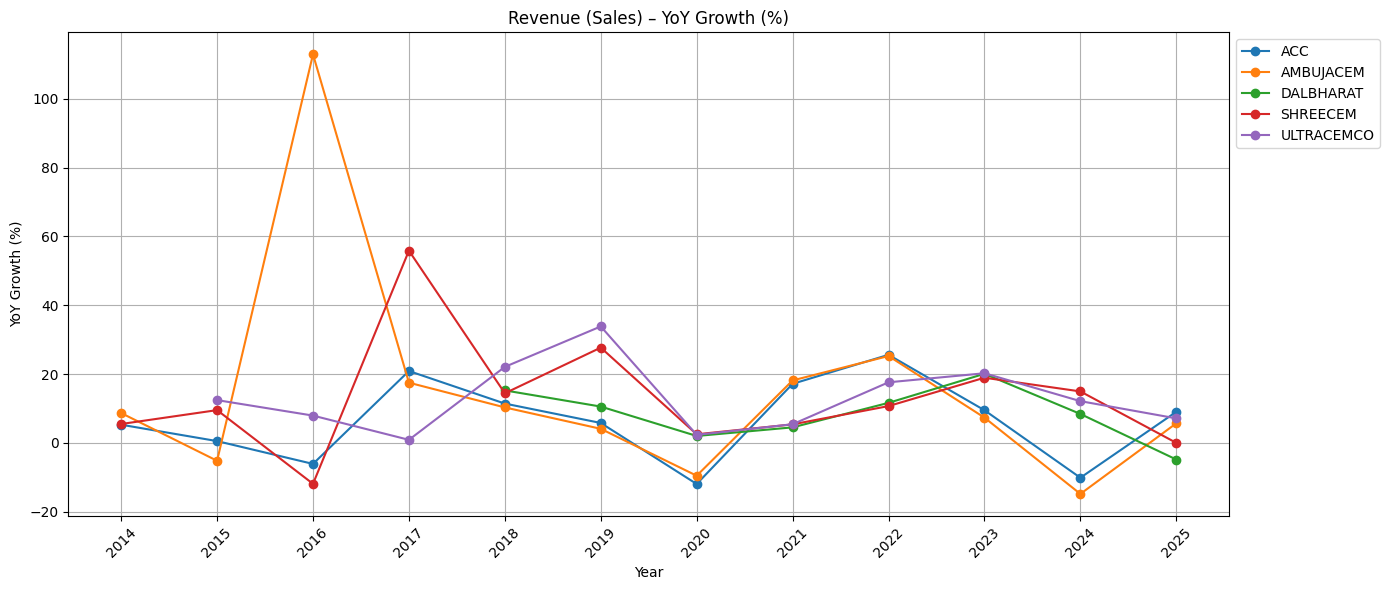

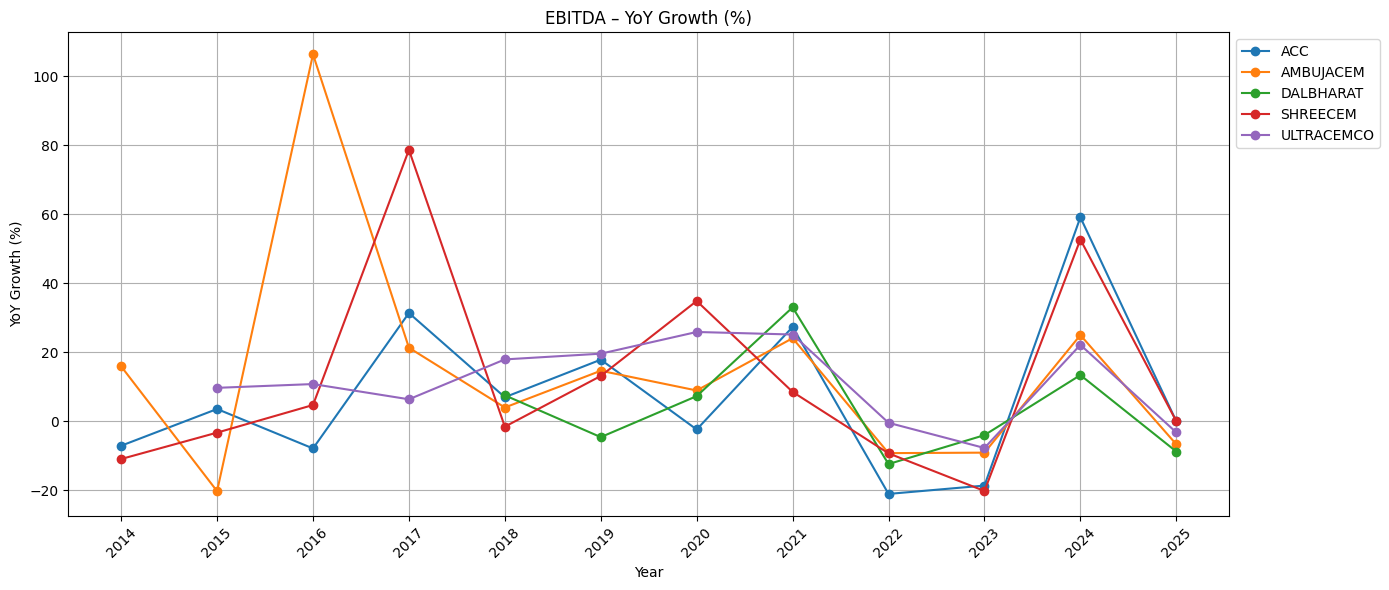

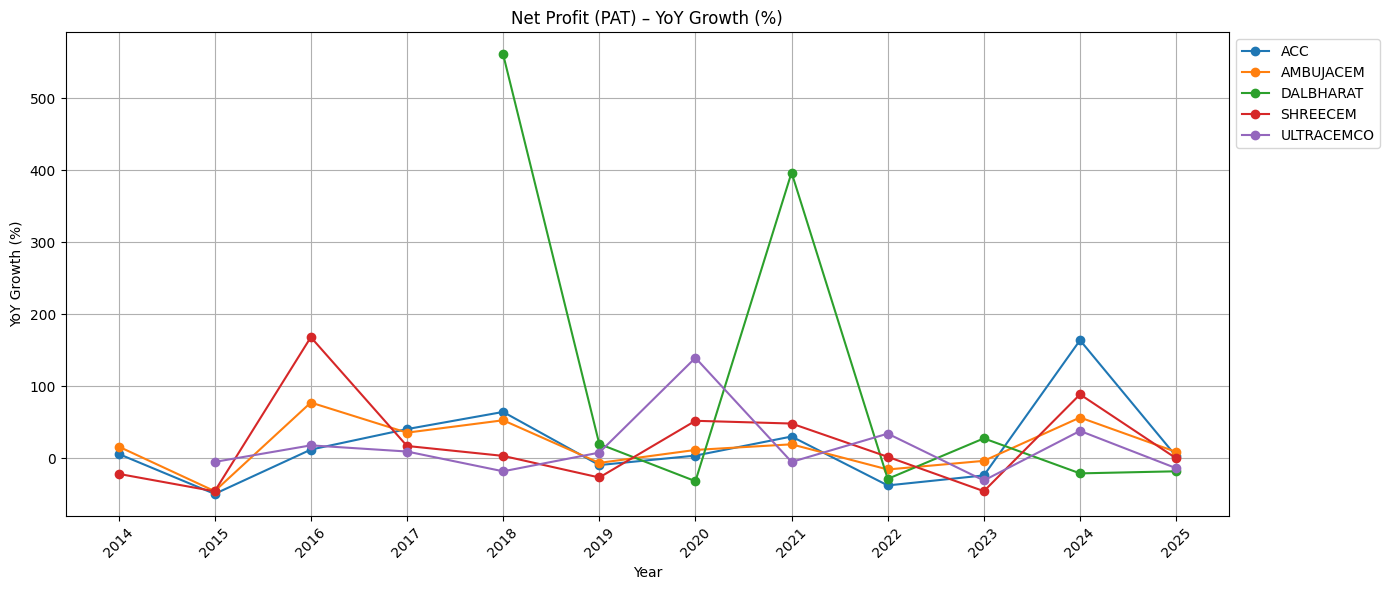

In [23]:
import matplotlib.pyplot as plt

# Function to plot YoY line chart per metric
def plot_yoy_growth(yoy_df, title):
    plt.figure(figsize=(14, 6))
    for company in yoy_df.index:
        plt.plot(yoy_df.columns, yoy_df.loc[company], marker='o', label=company)
    plt.title(f"{title} – YoY Growth (%)")
    plt.xlabel("Year")
    plt.ylabel("YoY Growth (%)")
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot YoY Growth for Sales, EBITDA, and PAT
plot_yoy_growth(sales_yoy, "Revenue (Sales)")
plot_yoy_growth(op_yoy, "EBITDA")
plot_yoy_growth(pat_yoy, "Net Profit (PAT)")


C:\Users\Padma\AppData\Local\Temp\ipykernel_20464\3678578514.py:10: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Padma\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


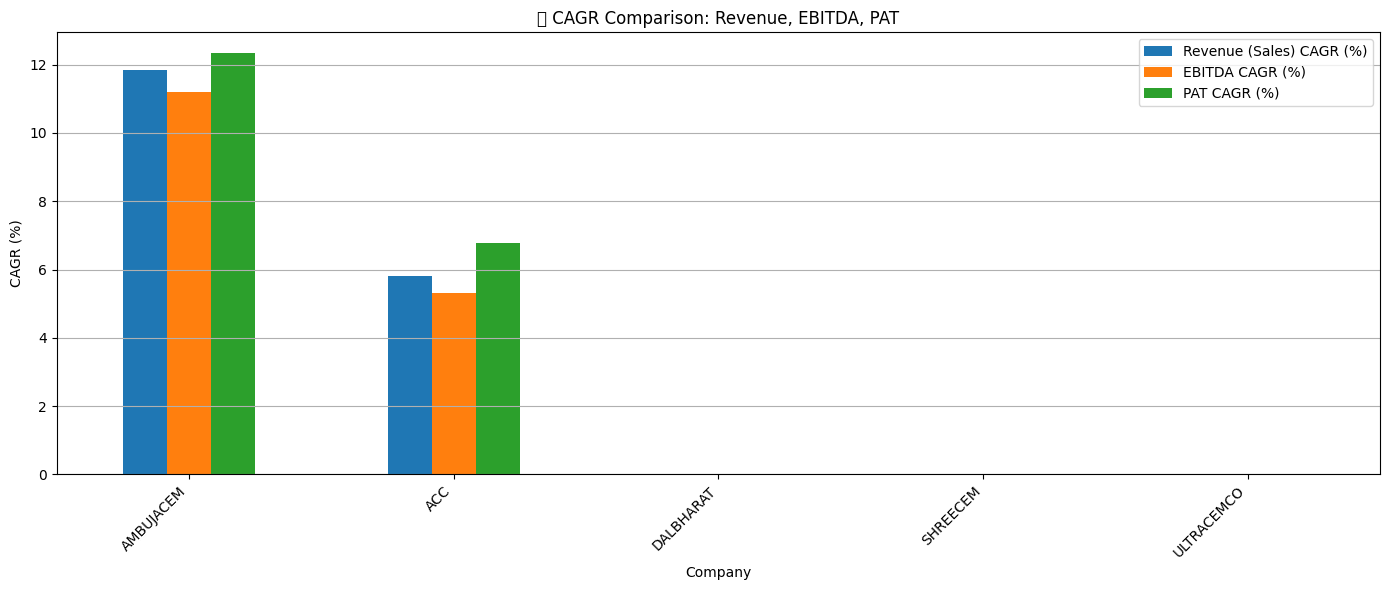

In [24]:
# Bar chart for CAGR
cagr_plot = cagr_table.sort_values(by='Revenue (Sales) CAGR (%)', ascending=False)

cagr_plot.plot(kind='bar', figsize=(14, 6))
plt.title("📊 CAGR Comparison: Revenue, EBITDA, PAT")
plt.xlabel("Company")
plt.ylabel("CAGR (%)")
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


<Figure size 1200x600 with 0 Axes>

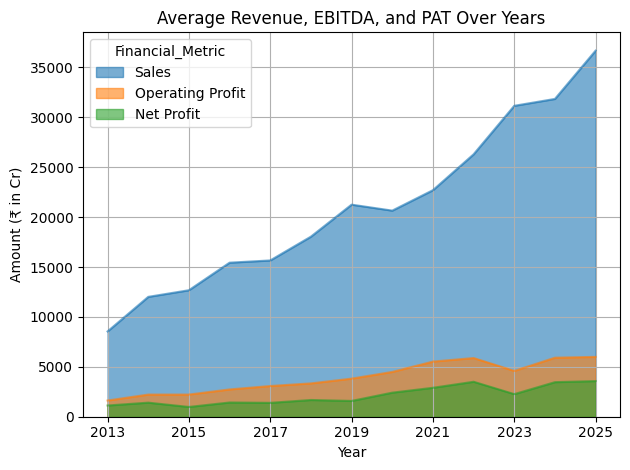

In [25]:
avg_df = df[df['Company'] == 'Average'].set_index(metric_col)[year_cols].T
avg_df = avg_df[['Sales', 'Operating Profit', 'Net Profit']]

plt.figure(figsize=(12, 6))
avg_df.plot(kind='area', stacked=False, alpha=0.6)
plt.title("Average Revenue, EBITDA, and PAT Over Years")
plt.xlabel("Year")
plt.ylabel("Amount (₹ in Cr)")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Padma\AppData\Local\Temp\ipykernel_20464\1469722980.py:21: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Padma\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


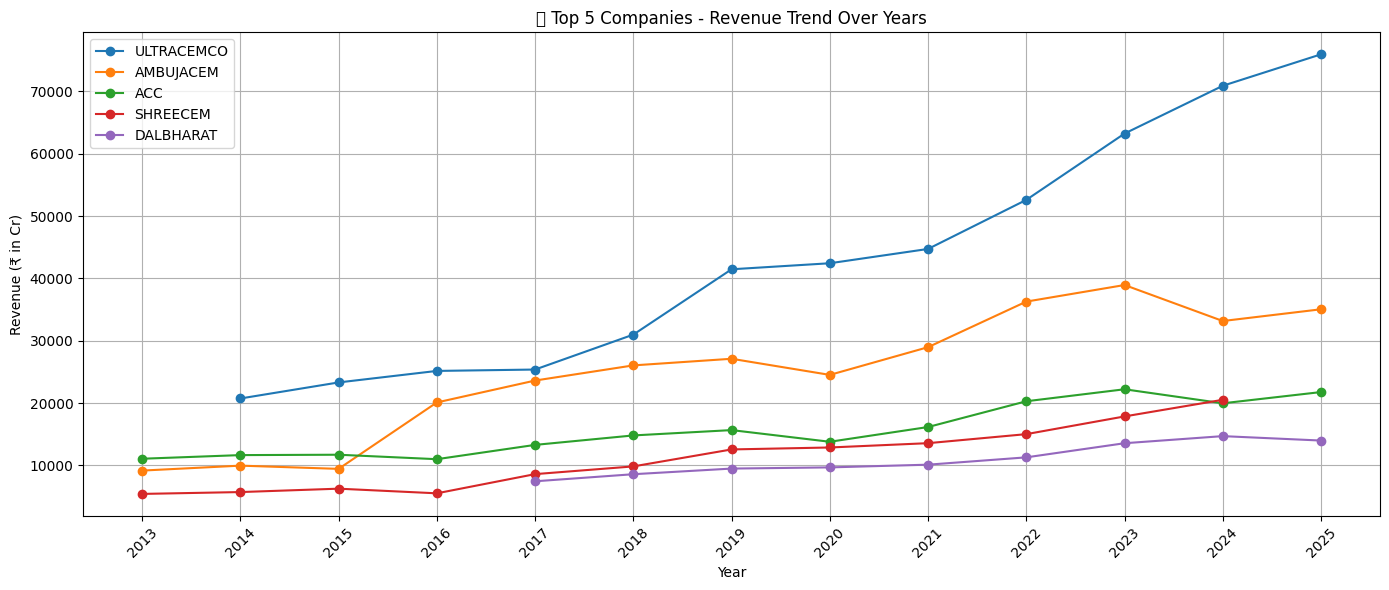

In [26]:
# Calculate average revenue per company across years
avg_revenue = sales_df.mean(axis=1)

# Select top 5 companies by average revenue
top_companies = avg_revenue.sort_values(ascending=False).head(5).index

# Filter sales_df for these top companies
top_sales = sales_df.loc[top_companies]

# Plot revenue trends of top 5 companies
plt.figure(figsize=(14, 6))
for company in top_sales.index:
    plt.plot(top_sales.columns, top_sales.loc[company], label=company, marker='o')

plt.title("📈 Top 5 Companies - Revenue Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Revenue (₹ in Cr)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Task 2:

In [27]:
# Extract metrics
def extract_metric(metric):
    return companies_df[companies_df[metric_col] == metric].set_index('Company')[year_cols]

In [28]:
sales = extract_metric('Sales')
op_profit = extract_metric('Operating Profit')
pat = extract_metric('Net Profit')
depreciation = extract_metric('Depreciation')

In [29]:
# Estimate Gross Profit = EBITDA + Depreciation
gross_profit = op_profit + depreciation

In [31]:
# Calculate margins
gross_margin = (gross_profit / sales) * 100
ebitda_margin = ((op_profit + depreciation) / sales) * 100
net_margin = (pat / sales) * 100

In [32]:
# Round for neatness
gross_margin = gross_margin.round(2)
ebitda_margin = ebitda_margin.round(2)
net_margin = net_margin.round(2)


In [33]:
# Export to Excel
with pd.ExcelWriter(r"C:\Users\Padma\OneDrive\Desktop\Cement\Margin_Analysis_Report.xlsx") as writer:
    gross_margin.to_excel(writer, sheet_name="Gross Margin")
    ebitda_margin.to_excel(writer, sheet_name="EBITDA Margin")
    net_margin.to_excel(writer, sheet_name="Net Margin")

print("✅ Exported all margin reports to Margin_Analysis_Report.xlsx")

✅ Exported all margin reports to Margin_Analysis_Report.xlsx


In [34]:
import matplotlib.pyplot as plt

import seaborn as sns

In [35]:
sns.set(style="whitegrid")

In [36]:
# === A. Bar Chart: Average Margins by Company ===
# Compute averages
avg_gross_margin = gross_margin.mean(axis=1)
avg_ebitda_margin = ebitda_margin.mean(axis=1)
avg_net_margin = net_margin.mean(axis=1)

In [37]:
# Combine into one DataFrame
avg_margins = pd.DataFrame({
    'Gross Margin (%)': avg_gross_margin,
    'EBITDA Margin (%)': avg_ebitda_margin,
    'Net Margin (%)': avg_net_margin
}).round(2)

C:\Users\Padma\AppData\Local\Temp\ipykernel_20464\3667794086.py:8: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Padma\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


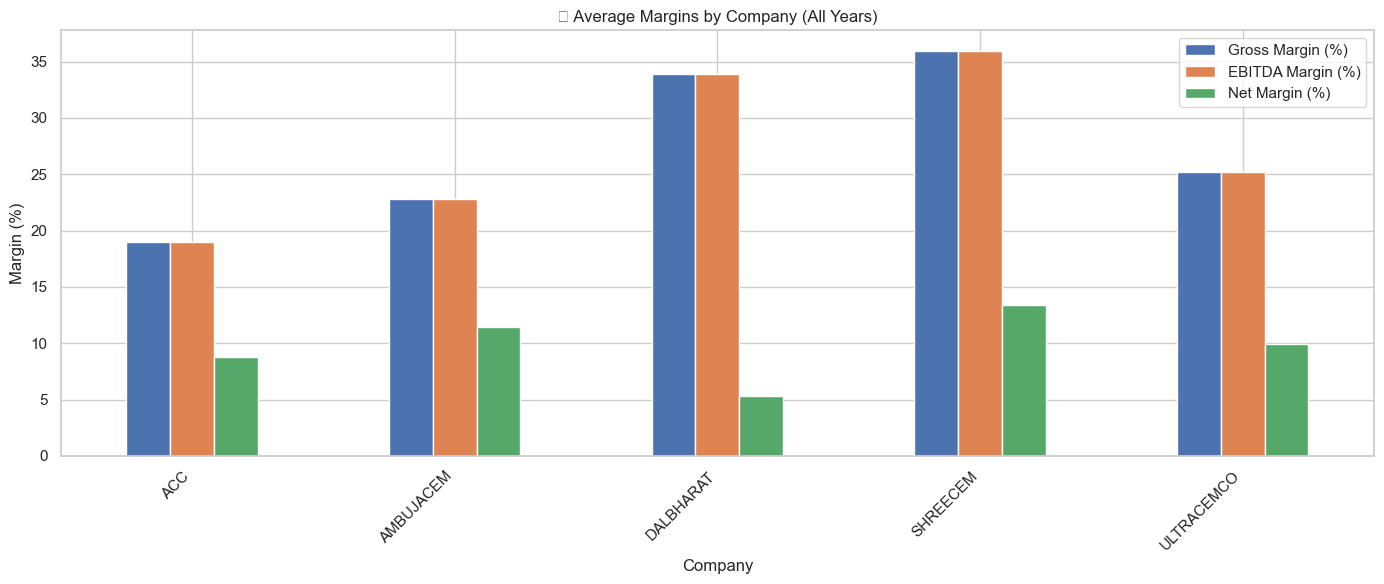

In [38]:
# Plot
avg_margins.plot(kind='bar', figsize=(14, 6))
plt.title("📊 Average Margins by Company (All Years)")
plt.ylabel("Margin (%)")
plt.xlabel("Company")
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [39]:
# Check missing values per company
missing_counts = ebitda_margin.isna().sum(axis=1)
print("Missing values per company:\n", missing_counts)

# Or, to see which years per company are missing:
print(ebitda_margin[ebitda_margin.isna().any(axis=1)])


Missing values per company:
 Company
ACC           1
AMBUJACEM     1
DALBHARAT     4
SHREECEM      1
ULTRACEMCO    1
dtype: int64
             2013   2014   2015   2016   2017   2018   2019   2020   2021  \
Company                                                                     
ACC         20.16  18.01  19.19  18.81  19.26  17.91  19.28  21.72  22.28   
AMBUJACEM   23.61  24.58  23.02  23.10  21.50  19.83  21.21  25.16  25.42   
DALBHARAT     NaN    NaN    NaN    NaN  41.91  37.87  34.14  37.33  39.76   
SHREECEM    36.86  33.95  36.25  40.53  43.38  34.29  34.00  43.36  39.48   
ULTRACEMCO    NaN  24.96  24.15  24.96  25.85  25.80  23.63  28.21  31.90   

             2022   2023   2024   2025  
Company                                 
ACC           NaN  12.45  19.77  18.67  
AMBUJACEM     NaN  17.38  24.19  24.11  
DALBHARAT   32.44  26.81  28.16  26.74  
SHREECEM    32.35  25.89  31.26    NaN  
ULTRACEMCO  27.05  21.36  22.73  21.81  


In [40]:
# Rename columns to ensure they are integers
ebitda_margin.columns = ebitda_margin.columns.astype(int)


In [41]:
# Interpolate missing values across years for each company
ebitda_margin_interpolated = ebitda_margin.interpolate(method='polynomial', order=2, axis=1, limit_direction='both')


In [42]:
ebitda_margin_interpolated.head

<bound method NDFrame.head of              2013   2014   2015   2016   2017   2018   2019   2020   2021  \
Company                                                                     
ACC         20.16  18.01  19.19  18.81  19.26  17.91  19.28  21.72  22.28   
AMBUJACEM   23.61  24.58  23.02  23.10  21.50  19.83  21.21  25.16  25.42   
DALBHARAT     NaN    NaN    NaN    NaN  41.91  37.87  34.14  37.33  39.76   
SHREECEM    36.86  33.95  36.25  40.53  43.38  34.29  34.00  43.36  39.48   
ULTRACEMCO    NaN  24.96  24.15  24.96  25.85  25.80  23.63  28.21  31.90   

                 2022   2023   2024   2025  
Company                                     
ACC         15.840947  12.45  19.77  18.67  
AMBUJACEM   19.888287  17.38  24.19  24.11  
DALBHARAT   32.440000  26.81  28.16  26.74  
SHREECEM    32.350000  25.89  31.26    NaN  
ULTRACEMCO  27.050000  21.36  22.73  21.81  >

In [43]:
ebitda_margin_interpolated.isna().sum()

2013    2
2014    1
2015    1
2016    1
2017    0
2018    0
2019    0
2020    0
2021    0
2022    0
2023    0
2024    0
2025    1
dtype: int64

C:\Users\Padma\AppData\Local\Temp\ipykernel_20464\974433516.py:10: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Padma\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


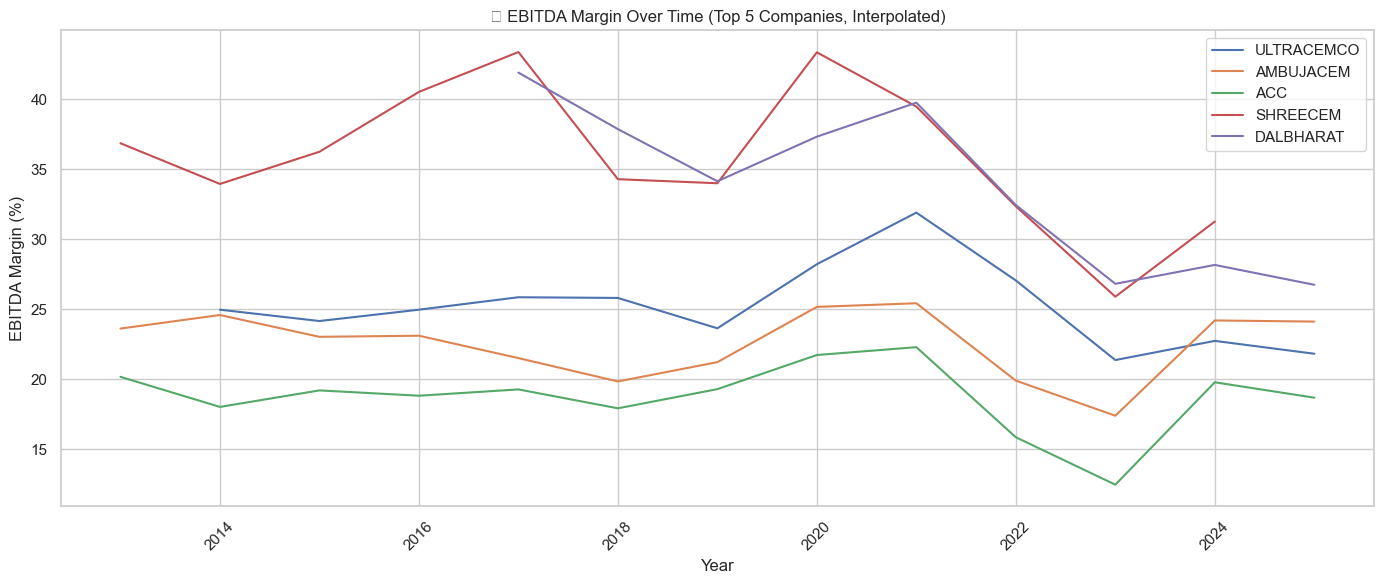

In [44]:
plt.figure(figsize=(14, 6))
for company in top_companies:
    plt.plot(ebitda_margin_interpolated.columns, ebitda_margin_interpolated.loc[company], label=f"{company}")
plt.title("📈 EBITDA Margin Over Time (Top 5 Companies, Interpolated)")
plt.xlabel("Year")
plt.ylabel("EBITDA Margin (%)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 3:

In [45]:
import pandas as pd


df = pd.read_excel(r"C:\Users\Padma\OneDrive\Desktop\Cement\Combined_P&L_With_Average_Median_Yearwise.xlsx")


# Melt the data so each row is one (Company, Metric, Year)
df_melted = df.melt(id_vars=['Financial_Metric', 'Company'], 
                    var_name='Year', value_name='Value')

# Pivot so each row is (Company, Year), and columns are metrics
df_pivot = df_melted.pivot_table(index=['Company', 'Year'], 
                                 columns='Financial_Metric', 
                                 values='Value').reset_index()


In [57]:
import pandas as pd


df = pd.read_excel(r"C:\Users\Padma\OneDrive\Desktop\Cement\Combined_P&L_With_Average_Median_Yearwise.xlsx")

financial_metrics_to_show = ['Expenses', 'Interest']

# Filter the DataFrame to only include these relevant financial metrics
filtered_df = df[df['Financial_Metric'].isin(financial_metrics_to_show)]

# Melt the DataFrame to transform the year columns into rows.
# This makes it easier to work with the data for aggregation and display.
melted_df = filtered_df.melt(
    id_vars=['Financial_Metric', 'Company'],
    var_name='Year',
    value_name='Amount'
)

# Convert the 'Year' column to numeric, coercing any errors to NaN.
# This ensures that only valid year numbers are processed.
melted_df['Year'] = pd.to_numeric(melted_df['Year'], errors='coerce')

# Drop any rows where the 'Year' conversion resulted in NaN (e.g., non-year columns)
melted_df.dropna(subset=['Year'], inplace=True)

# Sort the data for better readability, first by Company, then by Year, then by Financial Metric
sorted_df = melted_df.sort_values(by=['Company', 'Year', 'Financial_Metric'])

# Pivot the table to have 'Financial_Metric' as columns, showing the amounts for each.
# This creates the desired company-wise, year-wise breakdown.
company_breakdown_df = sorted_df.pivot_table(
    index=['Company', 'Year'],
    columns='Financial_Metric',
    values='Amount'
).reset_index()

# Rename the columns for clarity, reflecting what 'Expenses' actually represents in this data.
company_breakdown_df.columns.name = None # Remove the 'Financial_Metric' column name
company_breakdown_df = company_breakdown_df.rename(columns={
    'Expenses': 'Total Expenses (incl. COGS & Admin)',
    'Interest': 'Interest Expenses'
})

# Filter out 'Average' and 'Median' entries from the 'Company' column,
# as these are aggregate statistics, not individual companies.
companies_to_exclude = ['Average', 'Median']
final_company_breakdown = company_breakdown_df[~company_breakdown_df['Company'].isin(companies_to_exclude)].copy()


# Display the resulting DataFrame
print("Company-wise Breakdown of Total Expenses (including Cost of Goods Sold & Administrative Expenses) and Interest Expenses:")
print(final_company_breakdown)


Company-wise Breakdown of Total Expenses (including Cost of Goods Sold & Administrative Expenses) and Interest Expenses:
       Company  Year  Total Expenses (incl. COGS & Admin)  Interest Expenses
0          ACC  2013                               9416.0              114.0
1          ACC  2014                              10116.0               83.0
2          ACC  2015                              10123.0               65.0
3          ACC  2016                               9532.0               79.0
4          ACC  2017                              11370.0               99.0
5          ACC  2018                              12754.0               88.0
6          ACC  2019                              13245.0               86.0
7          ACC  2020                              11431.0               57.0
8          ACC  2021                              13154.0               55.0
9          ACC  2023                              20285.0               77.0
10         ACC  2024            

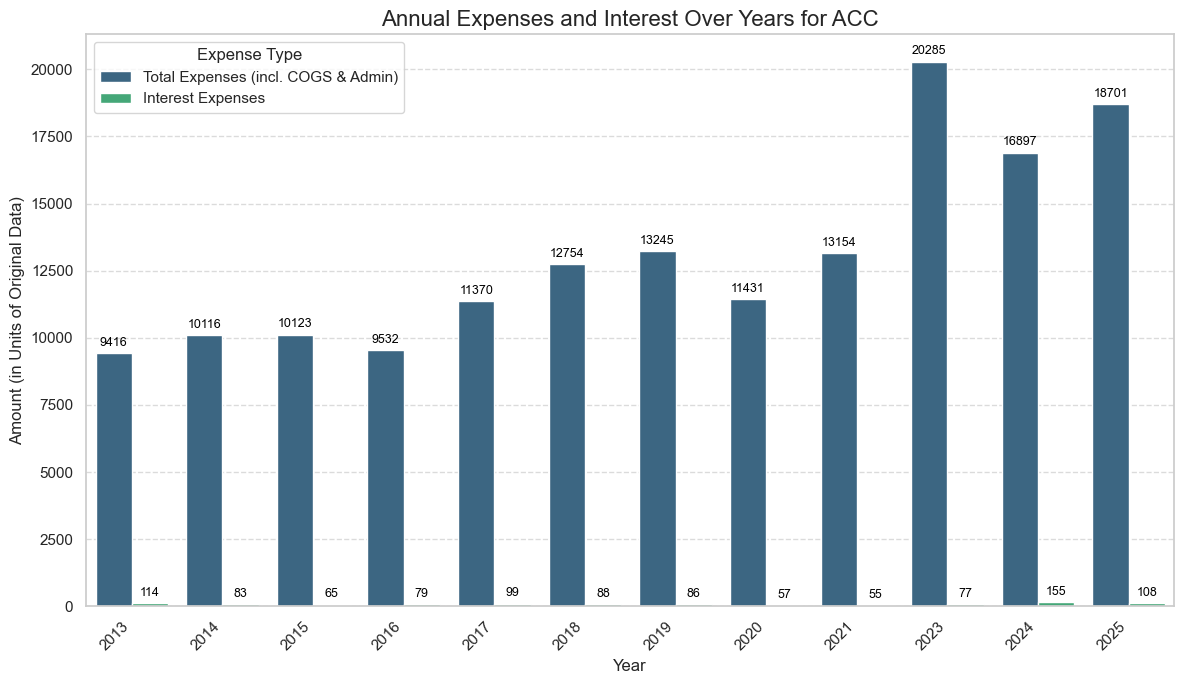

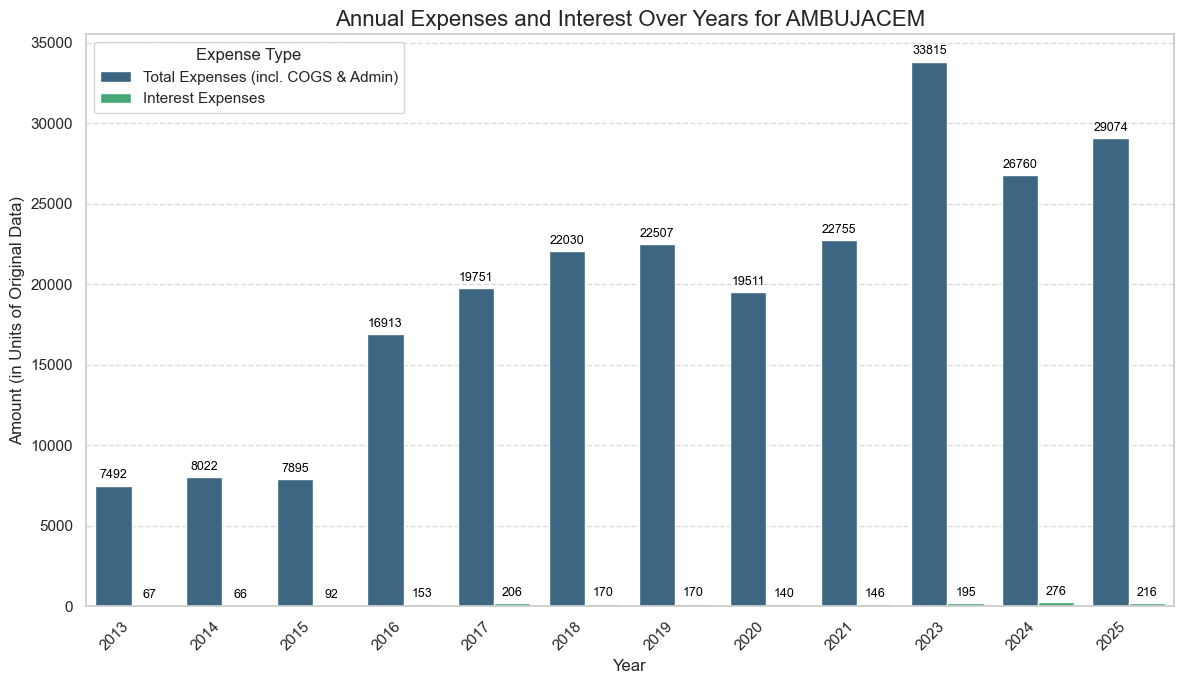

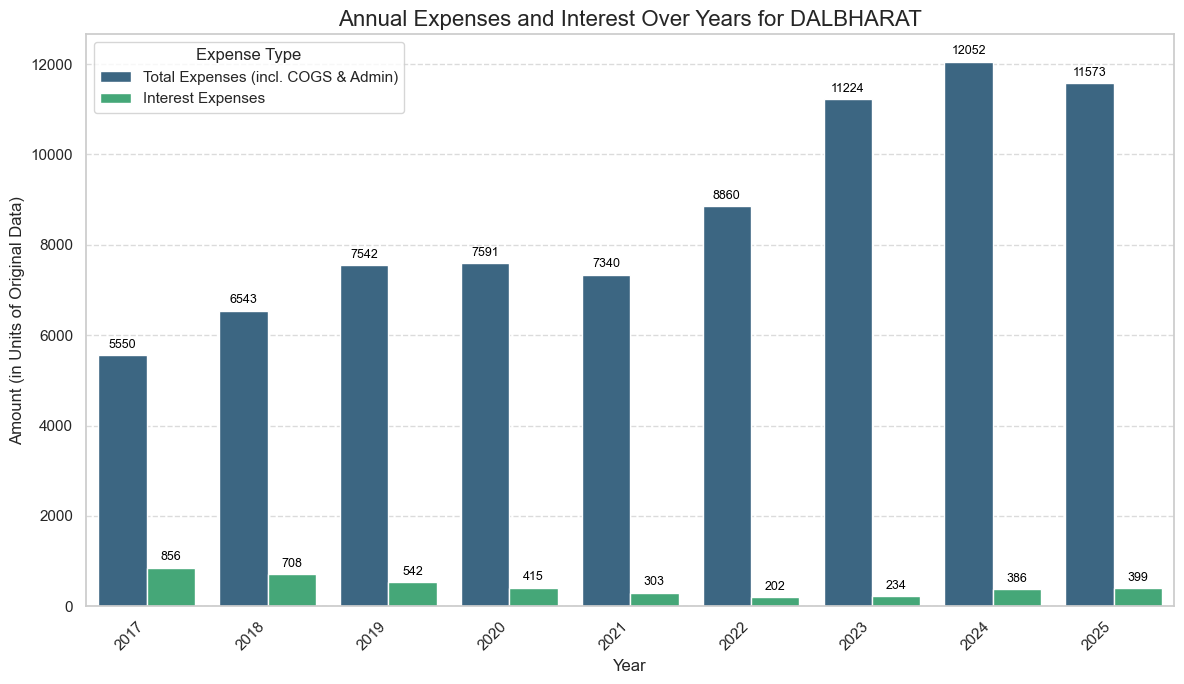

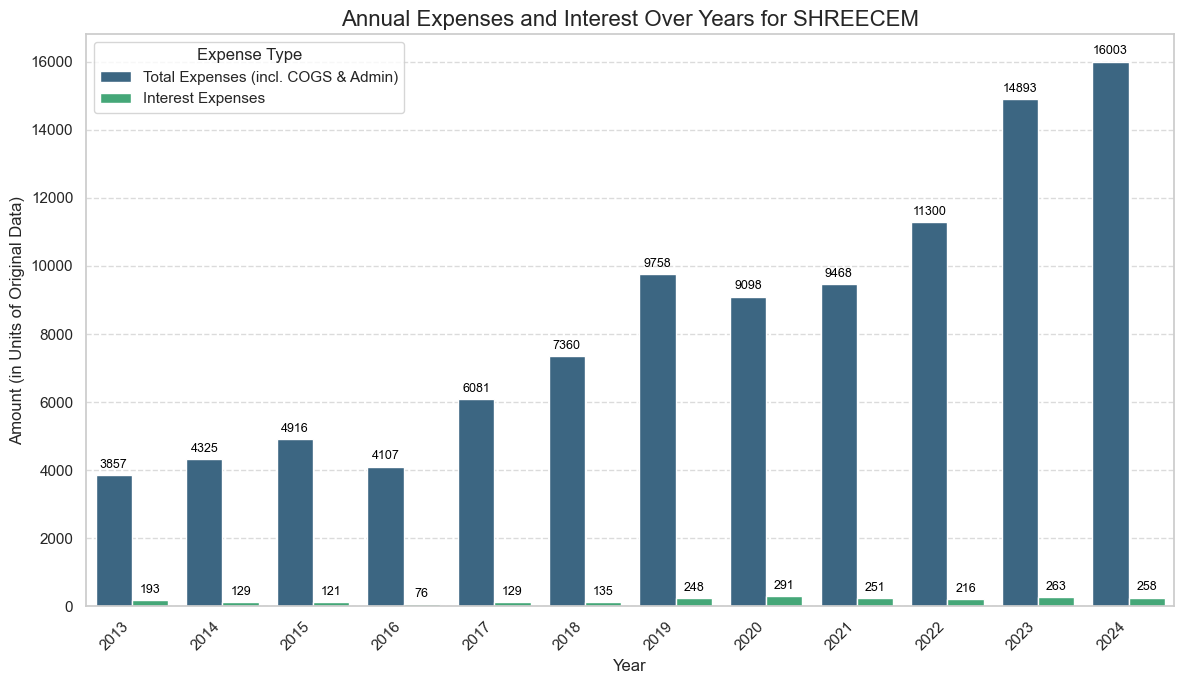

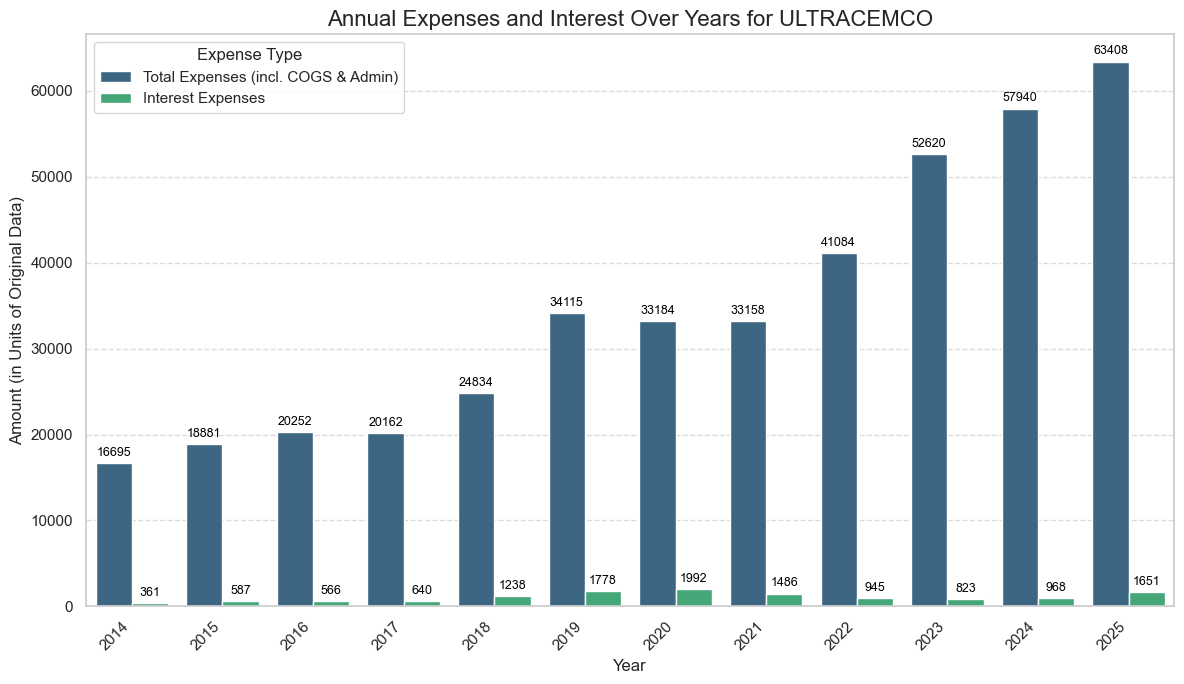

In [59]:
# Function to plot the data for a selected company
def plot_expenses_and_interest(data_frame, selected_company):
    """
    Generates a bar chart showing Total Expenses and Interest Expenses over years for a specific company.
    Adds numerical values on top of each bar for better understanding.

    Args:
        data_frame (pd.DataFrame): The DataFrame containing financial data.
        selected_company (str): The company to plot.
    """
    # Filter data for the selected company
    plot_data = data_frame[data_frame['Company'] == selected_company].copy()

    if plot_data.empty:
        print(f"No data available for {selected_company} to plot.")
        return

    plt.figure(figsize=(12, 7)) # Set the figure size for better readability

    # Melt the plot_data for easier plotting with seaborn's barplot
    plot_data_melted = plot_data.melt(id_vars='Year',
                                      value_vars=['Total Expenses (incl. COGS & Admin)', 'Interest Expenses'],
                                      var_name='Expense Type',
                                      value_name='Amount')

    # Create a bar plot using seaborn
    ax = sns.barplot(x='Year', y='Amount', hue='Expense Type', data=plot_data_melted, palette='viridis')

    # Add values over the bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=9, color='black', padding=3)


    plt.title(f'Annual Expenses and Interest Over Years for {selected_company}', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Amount (in Units of Original Data)', fontsize=12)
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better visibility
    plt.legend(title='Expense Type')
    plt.grid(axis='y', linestyle='--', alpha=0.7) # Add horizontal grid lines
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show() # Display the plot

# Get a list of unique companies (excluding 'Average' and 'Median')
companies_to_plot = sorted(final_company_breakdown['Company'].unique().tolist())

# Iterate through each company and generate a plot
for company in companies_to_plot:
    plot_expenses_and_interest(final_company_breakdown, company)


In [60]:
df_pivot['Expense_Ratio'] = df_pivot['Expenses'] / df_pivot['Sales']
df_pivot['Interest_Ratio'] = df_pivot['Interest'] / df_pivot['Sales']
df_pivot['EBIT_Margin'] = (df_pivot['Operating Profit']) / df_pivot['Sales']


In [61]:
avg_ratios = df_pivot.groupby('Company')[['Expense_Ratio', 'Interest_Ratio', 'EBIT_Margin']].mean().reset_index()


In [62]:
best_cost_control = avg_ratios.sort_values(by='Expense_Ratio')  # ascending → lower is better


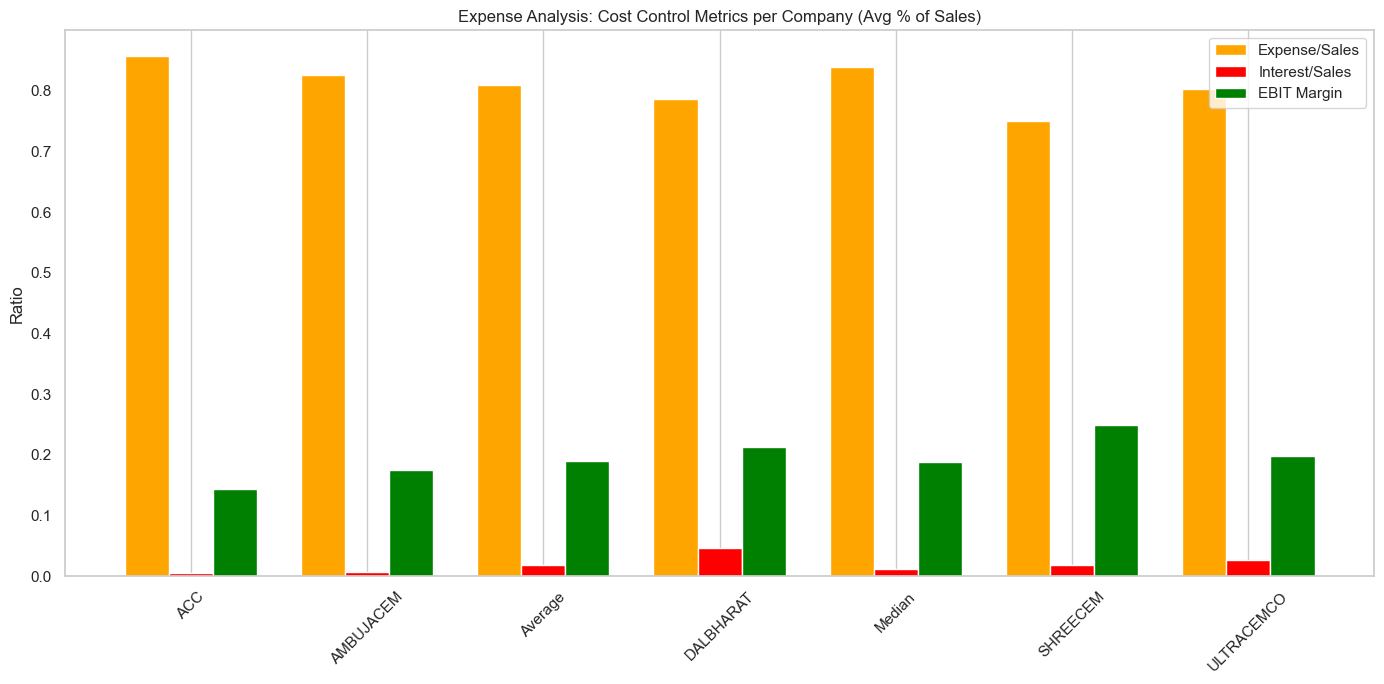

In [63]:
import matplotlib.pyplot as plt
import numpy as np

companies = avg_ratios['Company']
x = np.arange(len(companies))
bar_width = 0.25

plt.figure(figsize=(14, 7))
plt.bar(x - bar_width, avg_ratios['Expense_Ratio'], width=bar_width, label='Expense/Sales', color='orange')
plt.bar(x, avg_ratios['Interest_Ratio'], width=bar_width, label='Interest/Sales', color='red')
plt.bar(x + bar_width, avg_ratios['EBIT_Margin'], width=bar_width, label='EBIT Margin', color='green')

plt.xticks(x, companies, rotation=45)
plt.ylabel("Ratio")
plt.title("Expense Analysis: Cost Control Metrics per Company (Avg % of Sales)")
plt.legend()
plt.tight_layout()
plt.grid(axis='y')
plt.show()


In [64]:
 #Filter necessary metrics
metrics = ['Sales', 'Expenses', 'Operating Profit', 'Interest']
df_filtered = df[df['Financial_Metric'].isin(metrics)]



In [65]:
print(df.columns)

Index(['Financial_Metric', 'Company', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025'],
      dtype='object')


In [66]:
print(df_filtered.columns)


Index(['Financial_Metric', 'Company', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025'],
      dtype='object')


In [67]:
# Step 2: Ensure 'Company' is a column
if 'Company' not in df_filtered.columns:
    df_filtered = df_filtered.reset_index()

In [68]:
# Convert to wide format (companies as rows, metrics as columns)
latest_year = '2025'  # or '2024' if 2025 is missing
df_wide = df_filtered.pivot(index='Company', columns='Financial_Metric', values=latest_year).reset_index()

# Remove 'Average' and 'Median' rows from Company
df_wide = df_wide[~df_wide['Company'].isin(['Average', 'Median'])]

# Calculate ratios
df_wide['COGS/Sales'] = df_wide['Expenses'] / df_wide['Sales']
df_wide['Interest/Sales'] = df_wide['Interest'] / df_wide['Sales']
df_wide['EBIT Margin'] = df_wide['Operating Profit'] / df_wide['Sales']

# Optional: Select and rename columns for final table
final_df = df_wide[['Company', 'COGS/Sales', 'Interest/Sales', 'EBIT Margin']]

# Round for readability
final_df = final_df.round(2)

# Display or save
print(final_df)

Financial_Metric     Company  COGS/Sales  Interest/Sales  EBIT Margin
0                        ACC        0.86            0.00         0.14
1                  AMBUJACEM        0.83            0.01         0.17
3                  DALBHARAT        0.83            0.03         0.17
5                   SHREECEM         NaN             NaN          NaN
6                 ULTRACEMCO        0.83            0.02         0.17


In [69]:
# Add summary rows if needed
summary_df = final_df[['COGS/Sales', 'Interest/Sales', 'EBIT Margin']].agg(['mean', 'median']).round(2)
summary_df.insert(0, 'Company', ['Average', 'Median'])

# Append to final_df if needed
final_df = pd.concat([final_df, summary_df], ignore_index=True)


In [70]:
final_df.describe

<bound method NDFrame.describe of Financial_Metric     Company  COGS/Sales  Interest/Sales  EBIT Margin
0                        ACC        0.86            0.00         0.14
1                  AMBUJACEM        0.83            0.01         0.17
2                  DALBHARAT        0.83            0.03         0.17
3                   SHREECEM         NaN             NaN          NaN
4                 ULTRACEMCO        0.83            0.02         0.17
5                    Average        0.84            0.02         0.16
6                     Median        0.83            0.02         0.17>

<Figure size 1400x600 with 0 Axes>

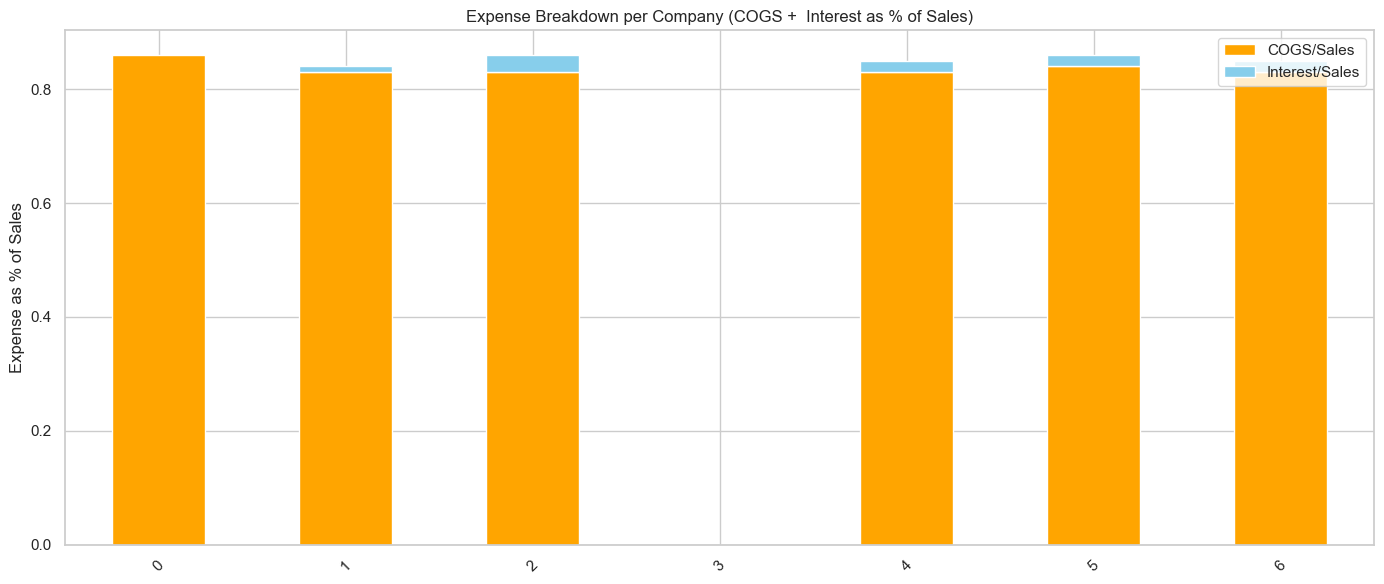

In [71]:


# Stacked bar plot for Expense Breakdown
plt.figure(figsize=(14, 6))
final_df[['COGS/Sales','Interest/Sales']].plot(kind='bar', stacked=True, figsize=(14,6), color=['orange', 'skyblue', 'red'])

plt.ylabel('Expense as % of Sales')
plt.title('Expense Breakdown per Company (COGS +  Interest as % of Sales)')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Padma\AppData\Local\Temp\ipykernel_20464\122233741.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=final_df_sorted, y='Company', x='COGS/Sales', palette=colors)


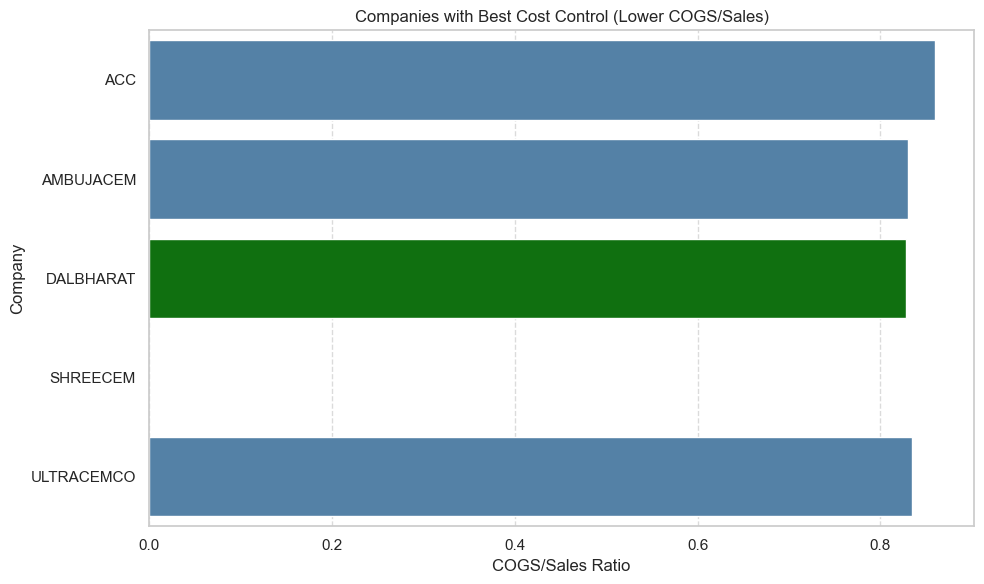

In [72]:
# Sort by COGS/Sales (ascending: best cost control at top)
final_df_sorted = final_df.sort_values(by='COGS/Sales', ascending=True)

# Remove 'Average' and 'Median' rows from Company
final_df_sorted = df_wide[~df_wide['Company'].isin(['Average', 'Median'])]


# Plot
plt.figure(figsize=(10, 6))
colors = ['green' if val == final_df_sorted['COGS/Sales'].min() else 'steelblue' for val in final_df_sorted['COGS/Sales']]

sns.barplot(data=final_df_sorted, y='Company', x='COGS/Sales', palette=colors)
plt.title('Companies with Best Cost Control (Lower COGS/Sales)')
plt.xlabel('COGS/Sales Ratio')
plt.ylabel('Company')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

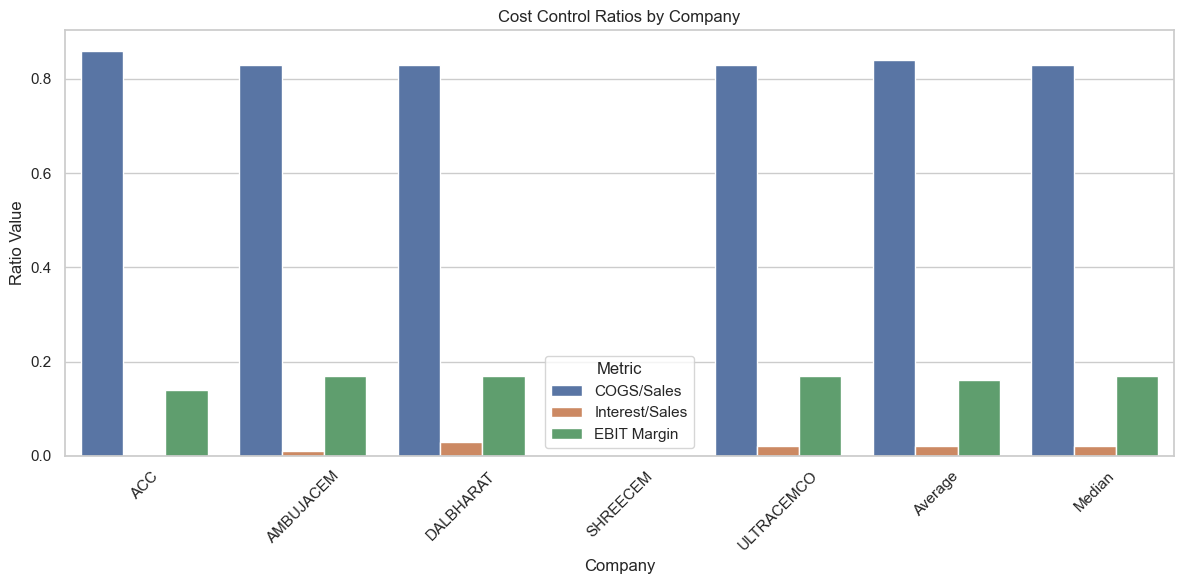

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Remove 'Average' and 'Median' from Company column
cleaned_df = final_df[~final_df['Company'].isin(['Average', 'Median'])]

# Melt data to long format for grouped barplot
melted_df = final_df.melt(id_vars='Company', var_name='Metric', value_name='Value')



# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='Company', y='Value', hue='Metric')
plt.title('Cost Control Ratios by Company')
plt.ylabel('Ratio Value')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


C:\Users\Padma\AppData\Local\Temp\ipykernel_20464\955993249.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=sorted_df, x='COGS/Sales', y='Company', palette='Blues')
posx and posy should be finite values
posx and posy should be finite values


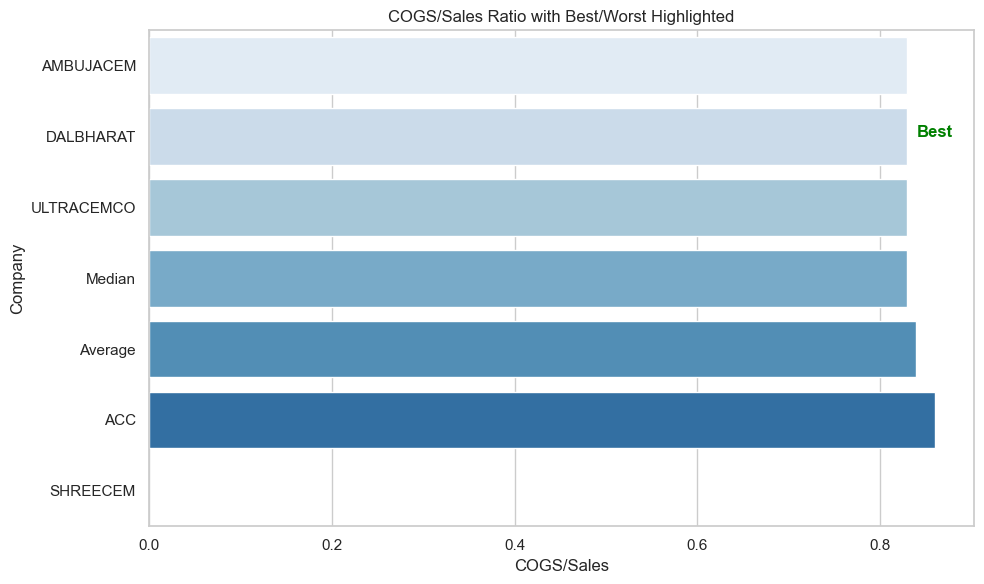

In [74]:
import seaborn as sns

# Sort and annotate
sorted_df = final_df.sort_values(by='COGS/Sales')
plt.figure(figsize=(10, 6))
bars = sns.barplot(data=sorted_df, x='COGS/Sales', y='Company', palette='Blues')

# Annotations for best and worst
best = sorted_df.iloc[0]
worst = sorted_df.iloc[-1]
plt.text(best['COGS/Sales'] + 0.01, best.name, 'Best', color='green', weight='bold')
plt.text(worst['COGS/Sales'] + 0.01, worst.name, 'Worst', color='red', weight='bold')

plt.title('COGS/Sales Ratio with Best/Worst Highlighted')
plt.xlabel('COGS/Sales')
plt.tight_layout()
plt.show()


Index(['index', 'Financial_Metric', 'Company', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025'],
      dtype='object')


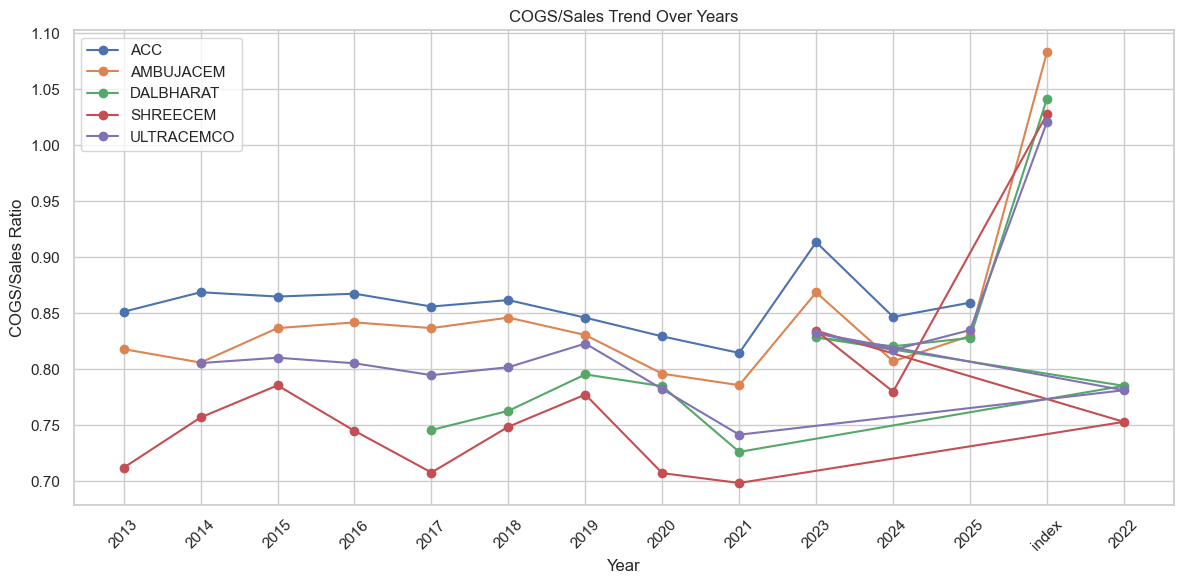

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Clean column names just in case
df.columns = df.columns.str.strip()
# Remove 'Average' and 'Median'
df = df[~df['Company'].isin(['Average', 'Median'])]

# Reset index if necessary
df = df.reset_index()

# Check columns
print(df.columns)

# Melt only if 'Company' and 'Financial_Metric' exist
if 'Company' in df.columns and 'Financial_Metric' in df.columns:
    df_melted = df.melt(id_vars=['Financial_Metric', 'Company'], var_name='Year', value_name='Value')

    # Filter for Sales and Expenses
    filtered = df_melted[df_melted['Financial_Metric'].isin(['Sales', 'Expenses'])]

    # Pivot to get Sales and Expenses as columns
    pivoted = filtered.pivot_table(index=['Company', 'Year'], columns='Financial_Metric', values='Value').reset_index()

    # Calculate COGS/Sales
    pivoted['COGS/Sales'] = pivoted['Expenses'] / pivoted['Sales']

    # Plot line chart
    plt.figure(figsize=(12, 6))
    for company in pivoted['Company'].unique():
        company_data = pivoted[pivoted['Company'] == company]
        plt.plot(company_data['Year'], company_data['COGS/Sales'], marker='o', label=company)

    plt.title('COGS/Sales Trend Over Years')
    plt.xlabel('Year')
    plt.ylabel('COGS/Sales Ratio')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Missing 'Company' or 'Financial_Metric' in columns. Check your DataFrame structure.")


### Task 4:

### o	Area chart for revenue, EBITDA, PAT.

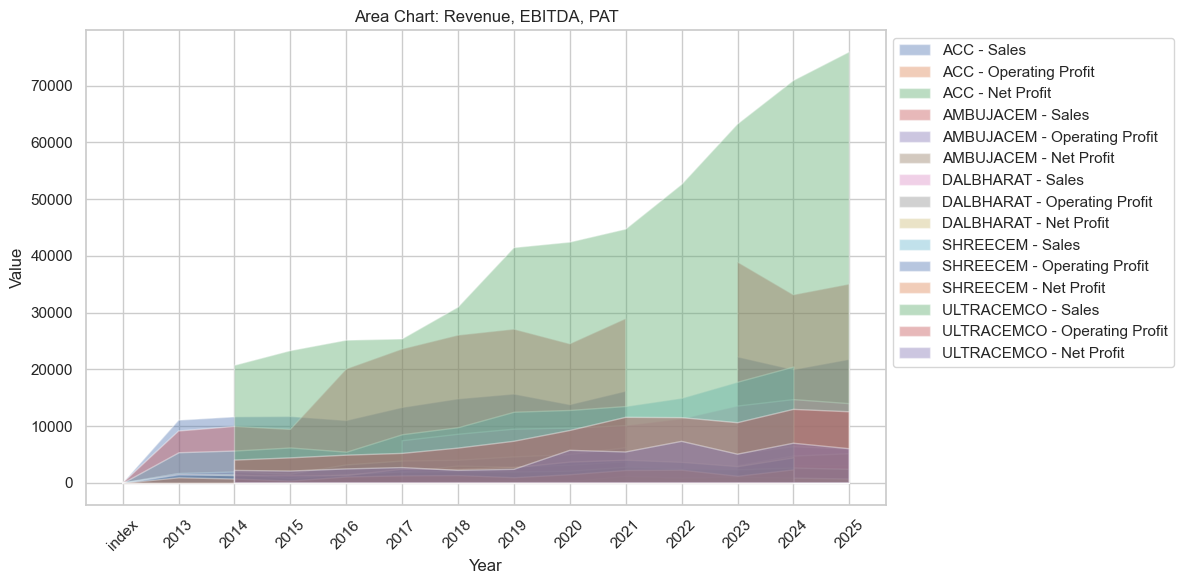

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Clean column names
df.columns = df.columns.str.strip()

# Remove 'Average' and 'Median'
df = df[~df['Company'].isin(['Average', 'Median'])]

# Filter for desired metrics
metrics = ['Sales', 'Operating Profit', 'Net Profit']
df_area = df[df['Financial_Metric'].isin(metrics)]

# Melt to long format
df_melted = df_area.melt(id_vars=['Company', 'Financial_Metric'], var_name='Year', value_name='Value')

# Plot: Area chart (stacked)
plt.figure(figsize=(12, 6))
for company in df['Company'].unique():
    for metric in metrics:
        subset = df_melted[(df_melted['Company'] == company) & (df_melted['Financial_Metric'] == metric)]
        plt.fill_between(subset['Year'], subset['Value'], label=f"{company} - {metric}", alpha=0.4)

plt.title("Area Chart: Revenue, EBITDA, PAT")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Company-wise bar chart for profit margins.



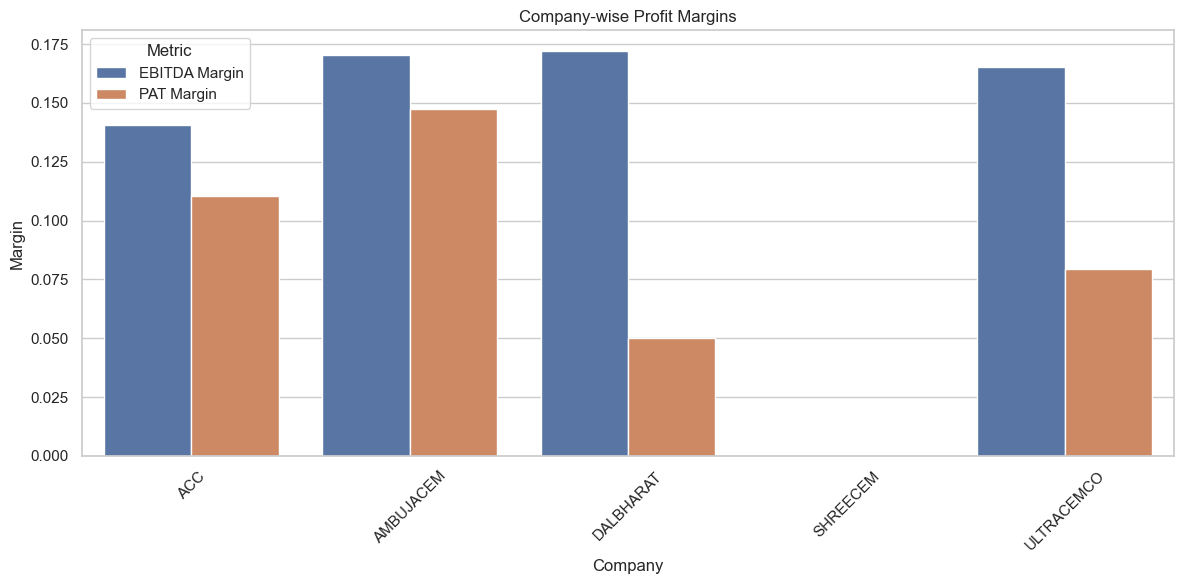

In [77]:
# Calculate margins
df_latest = df[df['Financial_Metric'].isin(['Sales', 'Operating Profit', 'Net Profit'])]
latest_year = '2025'  # Change as needed

df_wide = df_latest.pivot(index='Company', columns='Financial_Metric', values=latest_year).reset_index()
df_wide = df_wide[~df_wide['Company'].isin(['Average', 'Median'])]

# Compute margins
df_wide['EBITDA Margin'] = df_wide['Operating Profit'] / df_wide['Sales']
df_wide['PAT Margin'] = df_wide['Net Profit'] / df_wide['Sales']

# Melt for bar plot
margins_melted = df_wide.melt(id_vars='Company', value_vars=['EBITDA Margin', 'PAT Margin'],
                              var_name='Metric', value_name='Value')

# Plot bar chart
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=margins_melted, x='Company', y='Value', hue='Metric')
plt.title('Company-wise Profit Margins')
plt.ylabel('Margin')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


### Dynamic Code:

#### Task 1:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tkinter as tk
from tkinter import filedialog

# ================== ANALYSIS FUNCTION =====================
def analyze_pnl_data(excel_path, output_path=None, save_excel=False):
    df = pd.read_excel(excel_path)
    df.columns = df.columns.map(str.strip)
    metric_col = 'Financial_Metric' if 'Financial_Metric' in df.columns else 'Metric'
    year_cols = [col for col in df.columns if col.isdigit() and 2010 <= int(col) <= 2030]

    # Remove Average & Median
    companies_df = df[~df['Company'].isin(['Average', 'Median'])].copy()
    for col in year_cols:
        companies_df[col] = pd.to_numeric(companies_df[col], errors='coerce')

    def extract_metric(metric):
        return companies_df[companies_df[metric_col] == metric].set_index('Company')[year_cols]

    sales_df = extract_metric('Sales')
    op_df = extract_metric('Operating Profit')
    pat_df = extract_metric('Net Profit')

    def interpolate_polynomial_axis1(df, order=2):
        df_temp = df.copy()
        df_temp.columns = df_temp.columns.astype(int)
        df_interp = df_temp.interpolate(method='polynomial', order=order, axis=1, limit_direction='both')
        df_interp.columns = df_interp.columns.astype(str)
        return df_interp

    # Fill missing values
    sales_df = interpolate_polynomial_axis1(sales_df)
    op_df = interpolate_polynomial_axis1(op_df)
    pat_df = interpolate_polynomial_axis1(pat_df)

    # YoY Growth
    def yoy_growth(df): return df.pct_change(axis=1) * 100
    sales_yoy = yoy_growth(sales_df)
    op_yoy = yoy_growth(op_df)
    pat_yoy = yoy_growth(pat_df)

    # CAGR
    def calculate_cagr(df):
        start, end = year_cols[0], year_cols[-1]
        n = int(end) - int(start)
        cagr = ((df[end] / df[start]) ** (1/n) - 1) * 100
        return cagr.round(2)

    cagr_table = pd.DataFrame({
        'Revenue (Sales) CAGR (%)': calculate_cagr(sales_df),
        'EBITDA CAGR (%)': calculate_cagr(op_df),
        'PAT CAGR (%)': calculate_cagr(pat_df)
    }).round(2)

    # Excel export
    if save_excel and output_path:
        with pd.ExcelWriter(output_path) as writer:
            sales_yoy.to_excel(writer, sheet_name="YoY_Sales")
            op_yoy.to_excel(writer, sheet_name="YoY_EBITDA")
            pat_yoy.to_excel(writer, sheet_name="YoY_PAT")
            cagr_table.to_excel(writer, sheet_name="CAGR Summary")
        print(f"\n✅ Excel file saved to: {output_path}")

    # ========== 📈 Visualization ==========

    def plot_yoy_growth(yoy_df, title):
        plt.figure(figsize=(14, 6))
        for company in yoy_df.index:
            plt.plot(yoy_df.columns, yoy_df.loc[company], marker='o', label=company)
        plt.title(f"{title} – YoY Growth (%)")
        plt.xlabel("Year")
        plt.ylabel("YoY Growth (%)")
        plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    print("\n📊 Showing YoY Growth Charts...")
    plot_yoy_growth(sales_yoy, "Revenue (Sales)")
    plot_yoy_growth(op_yoy, "EBITDA")
    plot_yoy_growth(pat_yoy, "Net Profit (PAT)")

    print("\n📊 CAGR Comparison Chart...")
    cagr_plot = cagr_table.sort_values(by='Revenue (Sales) CAGR (%)', ascending=False)
    cagr_plot.plot(kind='bar', figsize=(14, 6))
    plt.title("📊 CAGR Comparison: Revenue, EBITDA, PAT")
    plt.xlabel("Company")
    plt.ylabel("CAGR (%)")
    plt.xticks(rotation=45, ha='right')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.grid(axis='y')
    plt.show()

    if 'Average' in df['Company'].unique():
        avg_df = df[df['Company'] == 'Average'].set_index(metric_col)[year_cols].T
        avg_df = avg_df[['Sales', 'Operating Profit', 'Net Profit']]
        avg_df.plot(kind='area', stacked=False, alpha=0.6, figsize=(12, 6))
        plt.title("📊 Average Revenue, EBITDA, PAT Over Years")
        plt.xlabel("Year")
        plt.ylabel("Amount (₹ in Cr)")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    avg_revenue = sales_df.mean(axis=1)
    top_companies = avg_revenue.sort_values(ascending=False).head(5).index
    top_sales = sales_df.loc[top_companies]

    print("\n📈 Top 5 Revenue Companies Trend...")
    plt.figure(figsize=(14, 6))
    for company in top_sales.index:
        plt.plot(top_sales.columns, top_sales.loc[company], label=company, marker='o')
    plt.title("📈 Top 5 Companies - Revenue Trend Over Years")
    plt.xlabel("Year")
    plt.ylabel("Revenue (₹ in Cr)")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return {
        "CAGR Table": cagr_table,
        "YoY Sales": sales_yoy,
        "YoY EBITDA": op_yoy,
        "YoY PAT": pat_yoy
    }

In [2]:
# ================== FILE DIALOG ===========================
def select_file():
    root = tk.Tk()
    root.withdraw()
    file_path = filedialog.askopenfilename(
        title="Select Excel File",
        filetypes=[("Excel Files", "*.xlsx *.xls")]
    )
    return file_path

# ================== MAIN EXECUTION ========================
if __name__ == "__main__":
    file_path = select_file()

    if not file_path or not os.path.isfile(file_path):
        print("❌ No valid file selected. Exiting...")
    else:
        print(f"📄 Selected file: {file_path}")
        save_option = input("💾 Do you want to save the output Excel file? (yes/no): ").strip().lower()
        save_excel = save_option == 'yes'

        output_path = None
        if save_excel:
            base_name = os.path.splitext(os.path.basename(file_path))[0]
            output_path = os.path.join(os.path.dirname(file_path), f"{base_name}_Analysis_Output.xlsx")

        analyze_pnl_data(excel_path=file_path, output_path=output_path, save_excel=save_excel)


❌ No valid file selected. Exiting...


In [13]:
%matplotlib inline
